In [1]:
import pandas as pd
df=pd.read_csv('ML 08_Smoking Data.csv')
df.head()

,region,age,sex,bmi,children,smoker
0,southwest,19,female,27.900,0,yes
1,southeast,18,male,33.770,1,no
2,southeast,28,male,33.000,3,no
3,northwest,33,male,22.705,0,no
4,northwest,32,male,28.880,0,no


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   region    1338 non-null   object 
 1   age       1338 non-null   int64  
 2   sex       1338 non-null   object 
 3   bmi       1338 non-null   float64
 4   children  1338 non-null   int64  
 5   smoker    1338 non-null   object 
dtypes: float64(1), int64(2), object(3)
memory usage: 62.8+ KB


In [3]:
df.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [4]:
smoking_rate = 217/(217+1064)
smoking_rate

0.16939890710382513

<AxesSubplot:xlabel='smoker', ylabel='count'>

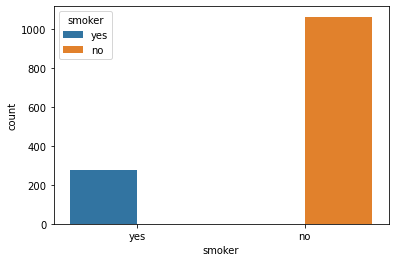

In [5]:
import seaborn as sns
sns.countplot(x='smoker',data=df,hue='smoker')

<AxesSubplot:xlabel='region', ylabel='count'>

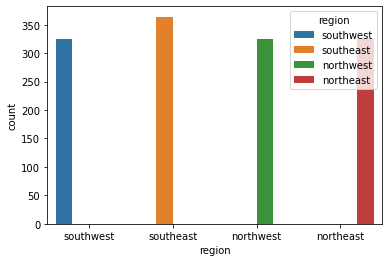

In [6]:
sns.countplot(x='region',data=df,hue='region')

# Encoding (using Label Encoder)

In [7]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [8]:
df.region=le.fit_transform(df.region)
df.sex=le.fit_transform(df.sex)
df.smoker=le.fit_transform(df.smoker)
df.head()

,region,age,sex,bmi,children,smoker
0,3,19,0,27.900,0,1
1,2,18,1,33.770,1,0
2,2,28,1,33.000,3,0
3,1,33,1,22.705,0,0
4,1,32,1,28.880,0,0


# Split the Data & Decision Tree Classification 

In [9]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(df.drop('smoker',axis=1),df['smoker'],train_size=.70,random_state=42)

In [10]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()

In [11]:
clf.fit(xtrain,ytrain)
testing=clf.predict(xtest)
testing     # Predicted result

array([0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,

In [12]:
     # WHY USING THIS TWO LINE?
import numpy as np
np.array(ytest)   # Actual result

array([0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,

In [13]:
clf.score(xtest,ytest)

0.681592039800995

In [14]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, plot_roc_curve

In [15]:
print(classification_report(ytest,testing))

              precision    recall  f1-score   support

           0       0.82      0.78      0.80       323
           1       0.24      0.28      0.26        79

    accuracy                           0.68       402
   macro avg       0.53      0.53      0.53       402
weighted avg       0.70      0.68      0.69       402



In [16]:
xtest.shape

(402, 5)

In [17]:
conmat=confusion_matrix(ytest,testing)
conmat

array([[252,  71],
       [ 57,  22]], dtype=int64)

In [18]:
(251+20)/(251+20+72+59)       #  (TP+TN)/(TP+FN+FP+TN)

0.6741293532338308

<AxesSubplot:>

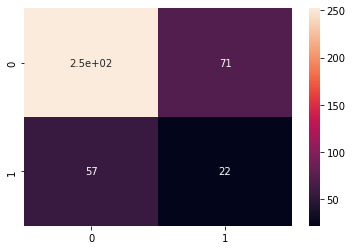

In [19]:
sns.heatmap(conmat,annot=True)

In [20]:
tp,fn,fp,tn=confusion_matrix(ytest,testing).reshape(-1)

In [21]:
(tp+tn)/(tp+fn+fp+tn)

0.681592039800995

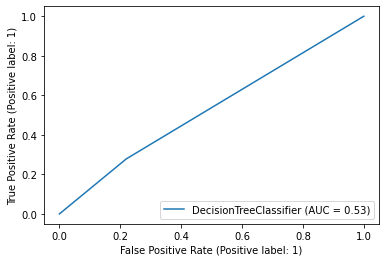

In [22]:
plot_roc_curve(clf,xtest,ytest)

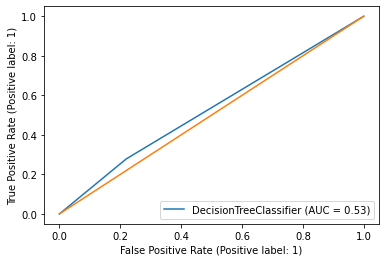

In [23]:
import matplotlib.pyplot as plt
plot_roc_curve(clf,xtest,ytest)
plt.plot([0,1],[0,1])